In [2]:
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt
import sklearn.metrics as sm
from sklearn import svm
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE
import seaborn as sb

In [3]:
#! pip install imbalanced-learn

In [4]:

# check version number
import imblearn
print(imblearn.__version__)

0.9.1


In [5]:
df = pd.read_csv("diabetes.csv")
df = df.drop_duplicates()
print(df)

      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0               2      138             62             35        0  33.6   
1               0       84             82             31      125  38.2   
2               0      145              0              0        0  44.2   
3               0      135             68             42      250  42.3   
4               1      139             62             41      480  40.7   
...           ...      ...            ...            ...      ...   ...   
1564            1      100             62              0        0  64.4   
1565            0      163             40             23       64  40.7   
1566            6      139             84             37        0  50.7   
1567            2      167             44             30      140  52.7   
1568            3      162              0            110      215  48.7   

      DiabetesPedigreeFunction  Age  Outcome  
0                        0.127   47        1  
1    

In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000
mean,3.752688,120.892473,68.959677,20.908602,79.534946,32.229704,0.472355,33.142473,0.340054
std,3.335541,31.943115,19.317521,16.311726,111.745897,8.206319,0.326181,11.751286,0.474046
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.400000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,36.000000,32.300000,0.375500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,130.000000,36.800000,0.632500,40.250000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


In [8]:
df_features = list(df.columns)
print(df_features)

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


In [9]:
print((df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']]== '?').sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [10]:
print((df[[ 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]== '0').sum())

Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64


In [11]:
labelEncoder = LabelEncoder()
dataTransform = df.copy()

In [12]:
for data in df.columns:
    dataTransform[data] = labelEncoder.fit_transform(df[data])

In [13]:
X = dataTransform.drop(["Outcome"], axis =1);
Y = dataTransform["Outcome"]

(array([491.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 253.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

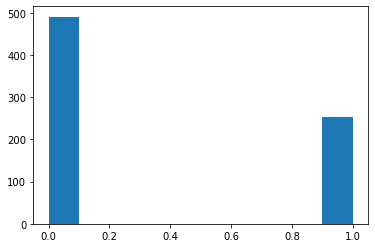

In [14]:
plt.hist(Y)

In [15]:
...
# transform the dataset
oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

(array([491.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 491.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

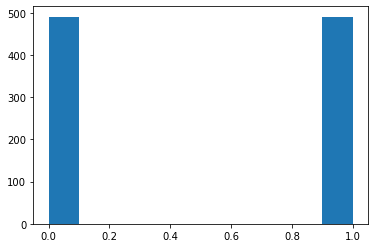

In [16]:
plt.hist(Y)

In [17]:
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2, random_state=10)

In [18]:


# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 100)

# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, Y_train)

# performing predictions on the test dataset
Y_pred = clf.predict(X_test)



accuracy = sm.accuracy_score(Y_test, Y_pred)
precision = sm.precision_score(Y_test, Y_pred)
recall = sm.recall_score(Y_test, Y_pred)
f1_score = sm.f1_score(Y_test, Y_pred)
print("Accuracy(%) = ", accuracy*100)
print("F1 Score (%) = ",f1_score*100)
print("Precision (%) = ",precision *100)
print("Recall (%) = ",recall*100)


Accuracy(%) =  83.75634517766497
F1 Score (%) =  83.83838383838385
Precision (%) =  83.0
Recall (%) =  84.6938775510204
